In [17]:
from tensorflow.keras.preprocessing.text import one_hot

In [18]:
sentences=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [19]:
import string
with open('sentences.txt', encoding='utf-8') as f:
    text = f.read().split('\n')

sentences = []
for sentence in text:
    # Remove punctuation and digits
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = ''.join(char for char in sentence if not char.isdigit())
    # Strip extra whitespace and add to the list if it's not empty
    if sentence.strip():
        sentences.append(sentence.strip())

In [20]:
sentences


['The quick brown fox jumps over the lazy dog',
 'She sold seashells by the seashore',
 'The stock market experienced a significant drop last week',
 'Quantum computing promises to revolutionize technology',
 'Yoga and meditation can improve mental wellbeing',
 'The artist painted a beautiful landscape of the mountains',
 'Economic policies impact global financial markets',
 'Astronomy helps us understand the universe and its origins',
 'Virtual reality is changing the way we experience games',
 'The chef prepared a gourmet meal with fresh ingredients']

In [21]:
vocab_size = 100

In [22]:
onehot_rep = [one_hot(sent, vocab_size) for sent in sentences]
onehot_rep

[[14, 75, 60, 8, 84, 98, 14, 16, 93],
 [92, 79, 86, 52, 14, 46],
 [14, 4, 41, 30, 60, 99, 6, 27, 5],
 [41, 24, 15, 57, 4, 23],
 [8, 73, 74, 69, 92, 65, 1],
 [14, 5, 56, 60, 42, 44, 32, 14, 7],
 [57, 42, 68, 28, 92, 27],
 [36, 56, 8, 61, 14, 31, 73, 39, 31],
 [62, 56, 89, 1, 14, 72, 6, 78, 67],
 [14, 43, 79, 60, 18, 97, 70, 98, 18]]

In [23]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [24]:
import numpy as np

sent_length = 20

embedded_docs = pad_sequences(onehot_rep, padding='pre', maxlen=sent_length)
embedded_docs

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14, 75, 60,  8, 84,
        98, 14, 16, 93],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 92, 79,
        86, 52, 14, 46],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  4, 41, 30, 60,
        99,  6, 27,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 41, 24,
        15, 57,  4, 23],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8, 73, 74,
        69, 92, 65,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  5, 56, 60, 42,
        44, 32, 14,  7],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 57, 42,
        68, 28, 92, 27],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 36, 56,  8, 61, 14,
        31, 73, 39, 31],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 62, 56, 89,  1, 14,
        72,  6, 78, 67],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14, 43, 79, 60, 18,
        97, 70, 98, 18]])

In [25]:
dim = 7

model = Sequential()
model.add(Embedding(vocab_size,7))
model.compile('adam', 'mse')

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
print(model.predict(embedded_docs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[[[ 0.03648497  0.03138497  0.01404531 ...  0.01127372 -0.04294361
   -0.00669511]
  [ 0.03648497  0.03138497  0.01404531 ...  0.01127372 -0.04294361
   -0.00669511]
  [ 0.03648497  0.03138497  0.01404531 ...  0.01127372 -0.04294361
   -0.00669511]
  ...
  [-0.04951207  0.0153388  -0.01626473 ...  0.02287925 -0.04837464
   -0.0244689 ]
  [ 0.04829968 -0.04757148  0.00259865 ... -0.00070206  0.00947467
    0.02584926]
  [-0.00022233  0.00759375 -0.01508077 ... -0.02082244 -0.03153412
   -0.04628996]]

 [[ 0.03648497  0.03138497  0.01404531 ...  0.01127372 -0.04294361
   -0.00669511]
  [ 0.03648497  0.03138497  0.01404531 ...  0.01127372 -0.04294361
   -0.00669511]
  [ 0.03648497  0.03138497  0.01404531 ...  0.01127372 -0.04294361
   -0.00669511]
  ...
  [-0.03559815 -0.01478035 -0.02709278 ...  0.0066502   0.00335038
    0.01002077]
  [-0.04951207  0.0153388  -0.01626473 ...  0.02287925 -0.04837464
   -0.0244689 ]
  [-0.02046484  0.01923874  0.0447

In [28]:
predictions = model.predict(embedded_docs)

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[[ 0.03648497,  0.03138497,  0.01404531, ...,  0.01127372,
         -0.04294361, -0.00669511],
        [ 0.03648497,  0.03138497,  0.01404531, ...,  0.01127372,
         -0.04294361, -0.00669511],
        [ 0.03648497,  0.03138497,  0.01404531, ...,  0.01127372,
         -0.04294361, -0.00669511],
        ...,
        [-0.04951207,  0.0153388 , -0.01626473, ...,  0.02287925,
         -0.04837464, -0.0244689 ],
        [ 0.04829968, -0.04757148,  0.00259865, ..., -0.00070206,
          0.00947467,  0.02584926],
        [-0.00022233,  0.00759375, -0.01508077, ..., -0.02082244,
         -0.03153412, -0.04628996]],

       [[ 0.03648497,  0.03138497,  0.01404531, ...,  0.01127372,
         -0.04294361, -0.00669511],
        [ 0.03648497,  0.03138497,  0.01404531, ...,  0.01127372,
         -0.04294361, -0.00669511],
        [ 0.03648497,  0.03138497,  0.01404531, ...,  0.01127372,
         -0.04294361, -0.00669511],
        ...,
        [-0.03559815, -0.01478035, -0.02709278, ...,  

In [29]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

def reduce_embeddings(M, k=2):
    n_iters = 10
    print(f"Original shape: {M.shape}")

    sentences, words_per_sentence, embedding_dim = M.shape
    M_reshaped = M.reshape(sentences * words_per_sentence, embedding_dim)
    
    print(f"Reshaped to: {M_reshaped.shape}")
    
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = svd.fit_transform(M_reshaped)
    
    print("Done.")
    return M_reduced


reduced_embeddings = reduce_embeddings(predictions, k=2)
print(reduced_embeddings)


Original shape: (10, 20, 7)
Reshaped to: (200, 7)
Done.
[[-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-8.5965507e-03 -7.5607836e-02]
 [-3.2376710e-02 -1.6494496e-03]
 [-3.2315779e-02  1.0150364e-02]
 [ 4.0280189e-02  2.2821421e-02]
 [-1.3931373e-02  3.4903958e-02]
 [ 1.9471662e-02 -4.6771716e-02]
 [-8.5965507e-03 -7.5607836e-02]
 [-7.0382389e-03  6.0601871e-02]
 [-2.5419837e-02 -3.8499884e-02]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.2510096e-03]
 [-7.0999824e-02  1.

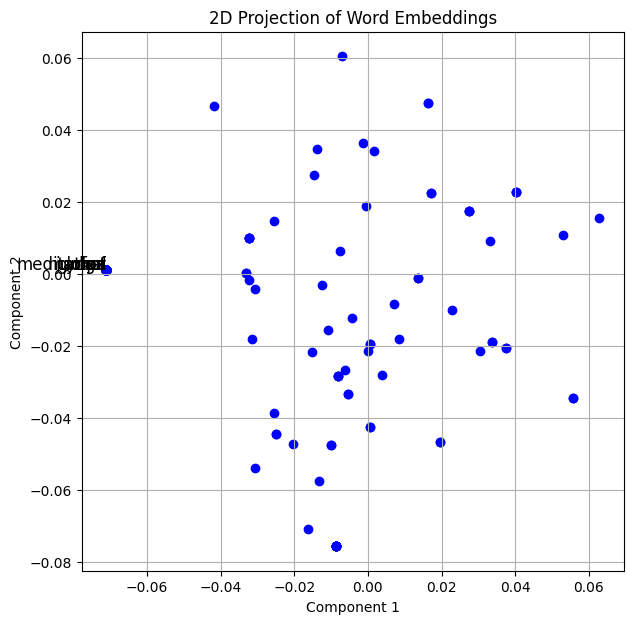

In [32]:
custom_words = ['fox', 'jumps', 'yoga', 'meditation', 'global', 'market', 'chef']
import matplotlib.pyplot as plt

def plot_embeddings(M_reduced, custom_words):
    plt.figure(figsize=(7, 7))
    
    plt.scatter(M_reduced[:, 0], M_reduced[:, 1], c='blue', marker='o')
    
    for i, word in enumerate(custom_words):
        plt.text(M_reduced[i, 0], M_reduced[i, 1], word, fontsize=12, ha='right')
    
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('2D Projection of Word Embeddings')
    plt.grid(True)
    plt.show()

# Example usage
plot_embeddings(reduced_embeddings, custom_words)
